In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Membaca file data
df = pd.read_csv('netflix_titles.csv')

# Lihat 5 data pertama
print(df.head())

# Ukuran dataset
print(df.shape)

# Info kolom & tipe data
print(df.info())

# Statistik deskriptif
print(df.describe(include='all'))


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [6]:
df.isnull().sum()
#Cek jumlah missing value

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [7]:
# Hapus semua baris dengan missing value
df_clean = df.dropna()

# Atau isi dengan nilai tertentu
#df['country'] = df['country'].fillna('Unknown')
#df['rating'] = df['rating'].fillna('Not Rated')

In [8]:
df_clean.isnull().sum()
#Cek jumlah missing value

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [9]:
# Cek duplikat
print(df_clean.duplicated().sum())

# Hapus duplikat
df_clean = df_clean.drop_duplicates()

0


<Axes: ylabel='duration'>

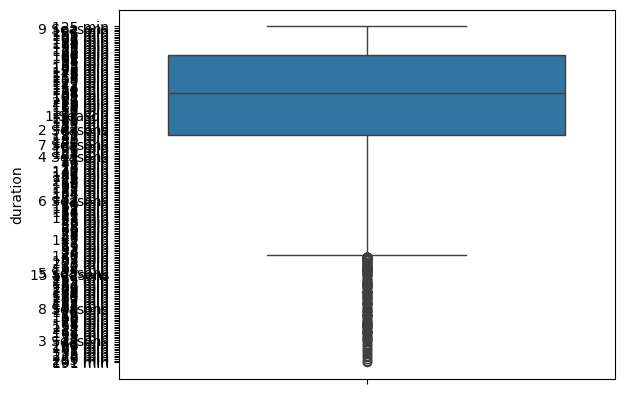

In [10]:
# Contoh jika kolom numerik ada
sns.boxplot(df_clean['duration']) # misalnya ada kolom durasi numerik

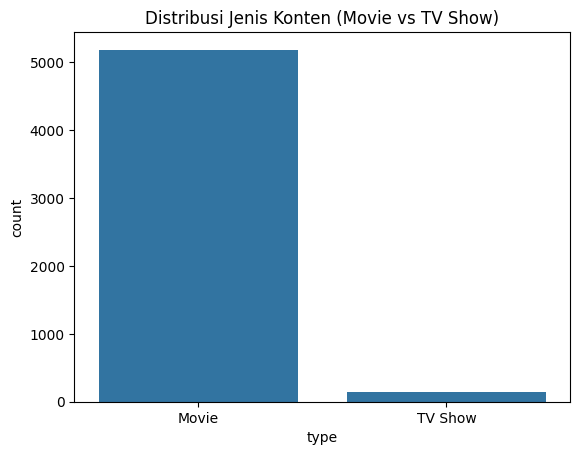

In [11]:
sns.countplot(data=df_clean, x='type')
plt.title("Distribusi Jenis Konten (Movie vs TV Show)")
plt.show()

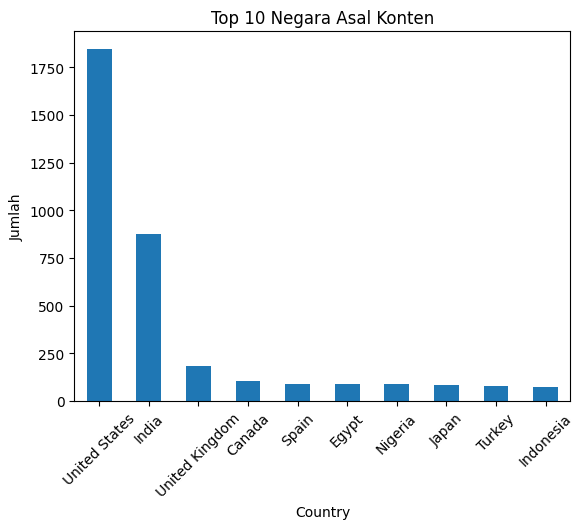

In [12]:
top_countries = df_clean['country'].value_counts().head(10)
top_countries.plot(kind='bar', title='Top 10 Negara Asal Konten')
plt.xlabel("Country")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.show()

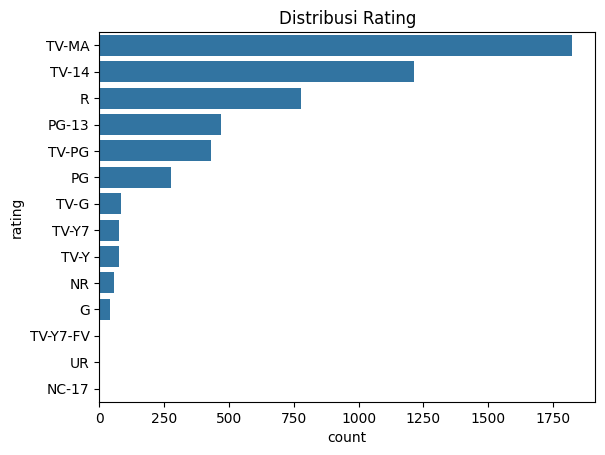

In [13]:
sns.countplot(data=df_clean, y='rating', order=df_clean['rating'].value_counts().index)
plt.title("Distribusi Rating")
plt.show()

In [14]:
df_clean['date_added'] = pd.to_datetime(df_clean['date_added'].str.strip(), errors='coerce')

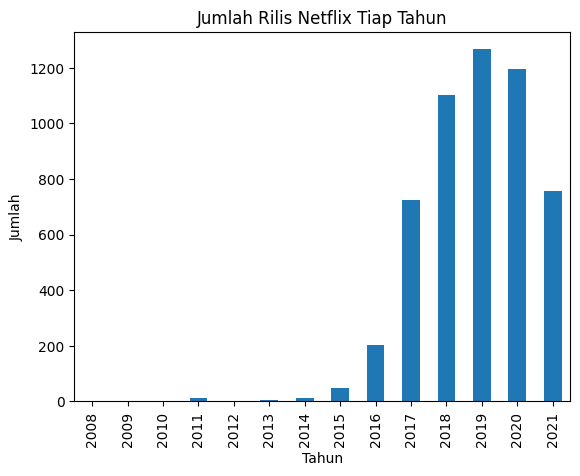

In [15]:
df_clean['year_added'] = df_clean['date_added'].dt.year

df_clean['year_added'].value_counts().sort_index().plot(kind='bar')
plt.title("Jumlah Rilis Netflix Tiap Tahun")
plt.xlabel("Tahun")
plt.ylabel("Jumlah")
plt.show()

In [16]:
df_clean.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
count,5332,5332,5332,5332,5332,5332,5332,5332.000000,5332,5332,5332,5332,5332.000000
unique,5332,2,5332,3945,5200,604,NaN,NaN,14,198,335,5321,NaN
top,s8807,Movie,Zubaan,"Raúl Campos, Jan Suter",Samuel West,United States,NaN,NaN,TV-MA,94 min,"Dramas, International Movies",When pretty new neighbor Seema falls for their...,NaN
freq,1,5185,1,18,10,1846,NaN,NaN,1822,135,336,2,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-28 19:27:46.316579072,2012.742123,NaN,NaN,NaN,NaN,2018.825956
min,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,1942.000000,NaN,NaN,NaN,NaN,2008.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2018-04-06 00:00:00,2011.000000,NaN,NaN,NaN,NaN,2018.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-17 00:00:00,2016.000000,NaN,NaN,NaN,NaN,2019.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-26 06:00:00,2018.000000,NaN,NaN,NaN,NaN,2020.000000
max,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-24 00:00:00,2021.000000,NaN,NaN,NaN,NaN,2021.000000


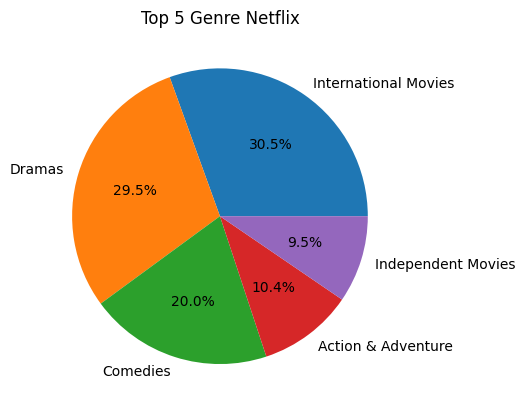

In [17]:
df_clean['listed_in'].str.split(', ').explode().value_counts().head(5).plot.pie(autopct='%1.1f%%')
plt.title("Top 5 Genre Netflix")
plt.ylabel("")
plt.show()

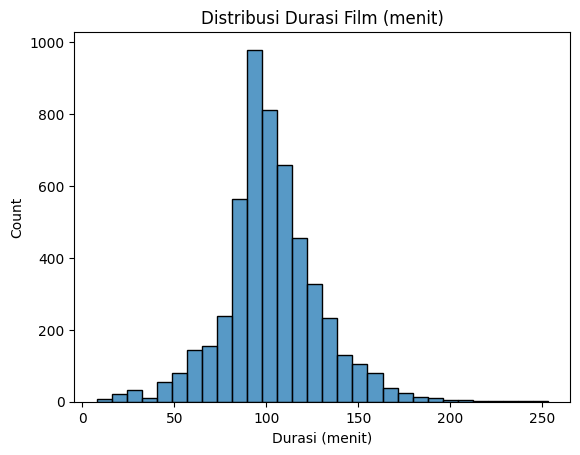

In [18]:
df_duration = df_clean[df_clean['type'] == 'Movie'].copy()
df_duration['duration_mins'] = df_duration['duration'].str.extract('(\d+)').astype(float)
sns.histplot(df_duration['duration_mins'], bins=30)
plt.title("Distribusi Durasi Film (menit)")
plt.xlabel("Durasi (menit)")
plt.show()

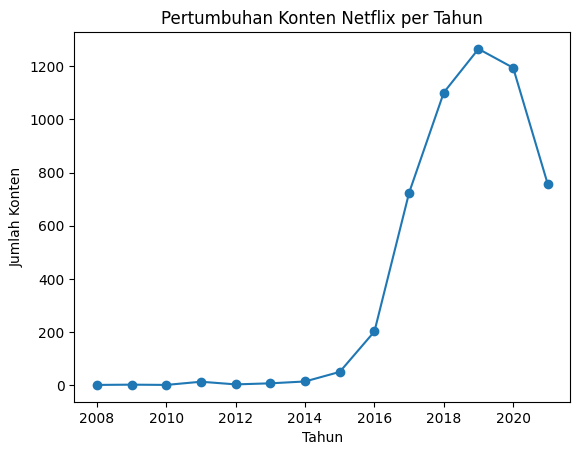

In [19]:
df_clean['year_added'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title("Pertumbuhan Konten Netflix per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Konten")
plt.show()

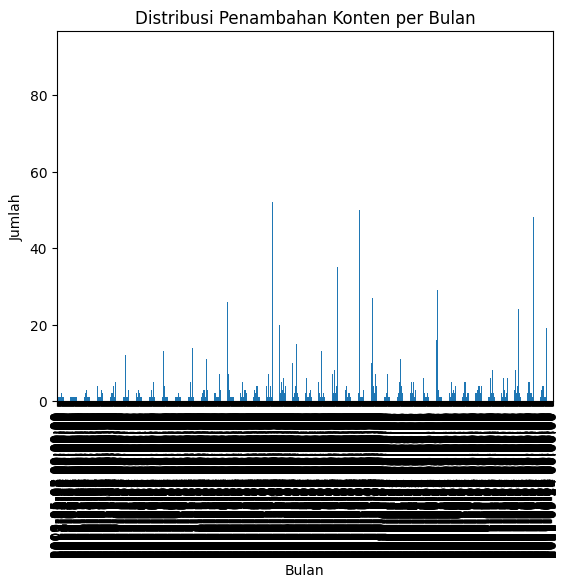

In [22]:
df_clean['date_added'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribusi Penambahan Konten per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah")
plt.show()

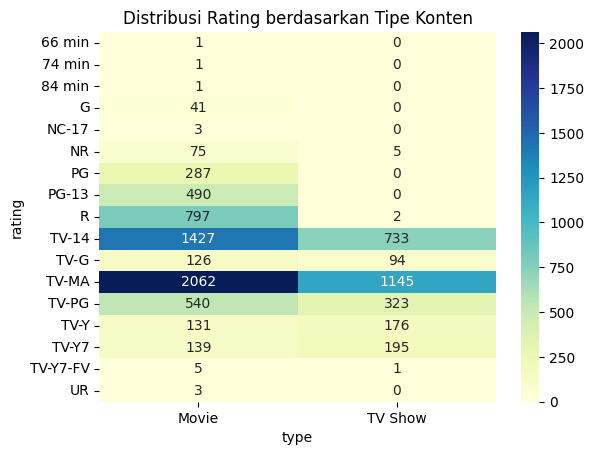

In [23]:
# Buat crosstab
genre_rating = pd.crosstab(df['rating'], df['type'])
sns.heatmap(genre_rating, cmap='YlGnBu', annot=True, fmt='d')
plt.title("Distribusi Rating berdasarkan Tipe Konten")
plt.show()

In [ ]:
## 📌 Kesimpulan Utama
- Netflix lebih banyak merilis Movie daripada TV Show
- Genre paling populer adalah Documentaries dan International Movies
- Puncak penambahan konten terjadi pada 2019–2020
- Negara penyumbang konten terbanyak adalah United States